In [0]:
import numpy as np
import pandas as pd

In [0]:
aisles = spark.read.csv("dbfs:/FileStore/shared_uploads/202318058@daiict.ac.in/aisles.csv", header=True, inferSchema=True)
departments = spark.read.csv("dbfs:/FileStore/shared_uploads/202318058@daiict.ac.in/departments.csv", header=True, inferSchema=True)
order_products_prior = spark.read.csv("dbfs:/FileStore/shared_uploads/202318058@daiict.ac.in/order_products__prior.csv", header=True, inferSchema=True)
order_products_train = spark.read.csv("dbfs:/FileStore/shared_uploads/202318058@daiict.ac.in/order_products__train.csv", header=True, inferSchema=True)
orders = spark.read.csv("dbfs:/FileStore/shared_uploads/202318058@daiict.ac.in/orders.csv", header=True, inferSchema=True)
products = spark.read.csv("dbfs:/FileStore/shared_uploads/202318058@daiict.ac.in/products.csv", header=True, inferSchema=True)

In [0]:
print("aisles shape:", (aisles.count(), len(aisles.columns)))
print("departments shape:", (departments.count(), len(departments.columns)))
print("order_products_prior shape:", (order_products_prior.count(), len(order_products_prior.columns)))
print("order_products_train shape:", (order_products_train.count(), len(order_products_train.columns)))
print("orders shape:", (orders.count(), len(orders.columns)))
print("products shape:", (products.count(), len(products.columns)))

aisles shape: (134, 2)
departments shape: (21, 2)
order_products_prior shape: (32434489, 4)
order_products_train shape: (1384617, 4)
orders shape: (3421083, 7)
products shape: (49688, 4)


In [0]:
print("aisles head:")
aisles.show()
print("departments head:")
departments.show()
print("order_products_prior head:")
order_products_prior.show()
print("order_products_train head:")
order_products_train.show()
print("orders head:")
orders.show()
print("products head:")
products.show()

aisles head:
+--------+--------------------+
|aisle_id|               aisle|
+--------+--------------------+
|       1|prepared soups sa...|
|       2|   specialty cheeses|
|       3| energy granola bars|
|       4|       instant foods|
|       5|marinades meat pr...|
|       6|               other|
|       7|       packaged meat|
|       8|     bakery desserts|
|       9|         pasta sauce|
|      10|    kitchen supplies|
|      11|    cold flu allergy|
|      12|         fresh pasta|
|      13|      prepared meals|
|      14|tofu meat alterna...|
|      15|    packaged seafood|
|      16|         fresh herbs|
|      17|  baking ingredients|
|      18|bulk dried fruits...|
|      19|       oils vinegars|
|      20|        oral hygiene|
+--------+--------------------+
only showing top 20 rows

departments head:
+-------------+---------------+
|department_id|     department|
+-------------+---------------+
|            1|         frozen|
|            2|          other|
|            3|

In [0]:
print("aisles schema:")
aisles.printSchema()
print("departments schema:")
departments.printSchema()
print("order_products_prior schema:")
order_products_prior.printSchema()
print("order_products_train schema:")
order_products_train.printSchema()
print("orders schema:")
orders.printSchema()
print("products schema:")
products.printSchema()

aisles schema:
root
 |-- aisle_id: integer (nullable = true)
 |-- aisle: string (nullable = true)

departments schema:
root
 |-- department_id: integer (nullable = true)
 |-- department: string (nullable = true)

order_products_prior schema:
root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)

order_products_train schema:
root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)

orders schema:
root
 |-- order_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable = true)

products schema:
root
 |-- produ

In [0]:
from pyspark.sql.functions import col, sum as spark_sum
#Check for missing values in each DataFrame
print("Missing values in aisles:")
aisles.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in aisles.columns]).show()
    
print("Missing values in departments:")
departments.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in departments.columns]).show()
    
print("Missing values in order_products_prior:")
order_products_prior.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in order_products_prior.columns]).show()
    
print("Missing values in order_products_train:")
order_products_train.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in order_products_train.columns]).show()
    
print("Missing values in orders:")
orders.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in orders.columns]).show()
    
print("Missing values in products:")
products.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in products.columns]).show()

Missing values in aisles:
+--------+-----+
|aisle_id|aisle|
+--------+-----+
|       0|    0|
+--------+-----+

Missing values in departments:
+-------------+----------+
|department_id|department|
+-------------+----------+
|            0|         0|
+-------------+----------+

Missing values in order_products_prior:
+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                0|        0|
+--------+----------+-----------------+---------+

Missing values in order_products_train:
+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                0|        0|
+--------+----------+-----------------+---------+

Missing values in orders:
+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eva

In [0]:
# Calculate missing values
missing_values = orders.select([((spark_sum(col(c).isNull().cast("int")) / orders.count()) * 100).alias(c) for c in orders.columns])

print("Percentage of data with missing values in orders.csv:")
missing_values.show()

# Calculate percentage of unique users
unique_users_percentage = orders.select('user_id').distinct().count() / orders.count() * 100
print("\nPercentage of unique users vs total data in orders.csv:", unique_users_percentage)

Percentage of data with missing values in orders.csv:
+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
|     0.0|    0.0|     0.0|         0.0|      0.0|              0.0|     6.027594185817766|
+--------+-------+--------+------------+---------+-----------------+----------------------+


Percentage of unique users vs total data in orders.csv: 6.027594185817766


In [0]:
from pyspark.sql.functions import col
# Filter orders DataFrame to include only the first orders of all users
first_orders = orders.filter(col("order_number") == 1)

# Check for null values in the first orders
null_values_first_orders = first_orders.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in first_orders.columns])

print("Null values present only for the first orders of all users:")
null_values_first_orders.show()

Null values present only for the first orders of all users:
+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
|       0|      0|       0|           0|        0|                0|                206209|
+--------+-------+--------+------------+---------+-----------------+----------------------+



In [0]:
from pyspark.sql.functions import when
# Fill null values with 0
orders_imputed = orders.fillna(0)

# Show the first few rows of the DataFrame after imputation
orders_imputed.show()

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                   0.0|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
| 2254736|      1|   prior|           4|        4|                7|                  29.0|
|  431534|      1|   prior|           5|        4|               15|                  28.0|
| 3367565|      1|   prior|           6|        2|                7|                  19.0|
|  550135|      1|   prior|           7|        1|                9|                  20.0|
| 3108588|      1|   prior|           8|        1|               14|            

In [0]:
# Concatenate order_products_prior and order_products_train DataFrames
prior_train_orders = order_products_prior.union(order_products_train)

# Sort the concatenated DataFrame by order_id
prior_train_orders = prior_train_orders.orderBy("order_id")

# Print the shape of prior_train_orders
print("Shape of prior_train_orders :", (prior_train_orders.count(), len(prior_train_orders.columns)))

# Show the first 20 rows of prior_train_orders
prior_train_orders.show()

Shape of prior_train_orders : (33819106, 4)
+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       1|     49302|                1|        1|
|       1|     11109|                2|        1|
|       1|     10246|                3|        0|
|       1|     49683|                4|        0|
|       1|     43633|                5|        1|
|       1|     13176|                6|        0|
|       1|     47209|                7|        0|
|       1|     22035|                8|        1|
|       2|     33120|                1|        1|
|       2|     28985|                2|        1|
|       2|      9327|                3|        0|
|       2|     45918|                4|        1|
|       2|     30035|                5|        0|
|       2|     17794|                6|        1|
|       2|     40141|                7|        1|
|       2|      1819|                8|        1|
|     

In [0]:
# Merge prior_train_orders DataFrame with products DataFrame
prior_train_orders = prior_train_orders.join(products, "product_id", "inner") \
                                           .orderBy("order_id") \
                                           .drop(products["product_id"])  # Drop duplicate product_id column

# Print the shape of prior_train_orders
print("Shape of prior_train_orders :", (prior_train_orders.count(), len(prior_train_orders.columns)))

# Show the first 10 rows of prior_train_orders
prior_train_orders.show(10)

Shape of prior_train_orders : (33819106, 7)
+----------+--------+-----------------+---------+--------------------+--------+-------------+
|product_id|order_id|add_to_cart_order|reordered|        product_name|aisle_id|department_id|
+----------+--------+-----------------+---------+--------------------+--------+-------------+
|     49302|       1|                1|        1|    Bulgarian Yogurt|     120|           16|
|     11109|       1|                2|        1|Organic 4% Milk F...|     108|           16|
|     10246|       1|                3|        0|Organic Celery He...|      83|            4|
|     49683|       1|                4|        0|      Cucumber Kirby|      83|            4|
|     43633|       1|                5|        1|Lightly Smoked Sa...|      95|           15|
|     13176|       1|                6|        0|Bag of Organic Ba...|      24|            4|
|     47209|       1|                7|        0|Organic Hass Avocado|      24|            4|
|     22035|    

In [0]:
# Merge prior_train_orders DataFrame with aisles DataFrame
prior_train_orders = prior_train_orders.join(aisles, "aisle_id", "inner") \
                                           .orderBy("order_id") \
                                           .drop(aisles["aisle_id"])  # Drop duplicate aisle_id column

# Print the shape of prior_train_orders
print("Shape of prior_train_orders :", (prior_train_orders.count(), len(prior_train_orders.columns)))

# Show the first few rows of prior_train_orders
prior_train_orders.show()

Shape of prior_train_orders : (33819103, 8)
+--------+----------+--------+-----------------+---------+--------------------+-------------+--------------------+
|aisle_id|product_id|order_id|add_to_cart_order|reordered|        product_name|department_id|               aisle|
+--------+----------+--------+-----------------+---------+--------------------+-------------+--------------------+
|     120|     49302|       1|                1|        1|    Bulgarian Yogurt|           16|              yogurt|
|     108|     11109|       1|                2|        1|Organic 4% Milk F...|           16|other creams cheeses|
|      83|     10246|       1|                3|        0|Organic Celery He...|            4|    fresh vegetables|
|      83|     49683|       1|                4|        0|      Cucumber Kirby|            4|    fresh vegetables|
|      95|     43633|       1|                5|        1|Lightly Smoked Sa...|           15| canned meat seafood|
|      24|     13176|       1|      

In [0]:
# Merge prior_train_orders DataFrame with departments DataFrame
prior_train_orders = prior_train_orders.join(departments, "department_id", "inner") \
                                           .orderBy("order_id") \
                                           .drop(departments["department_id"])  # Drop duplicate department_id column

# Print the shape of prior_train_orders
print("Shape of prior_train_orders :", (prior_train_orders.count(), len(prior_train_orders.columns)))

# Show the first 20 rows of prior_train_orders
prior_train_orders.show(20)

Shape of prior_train_orders : (33819103, 9)
+-------------+--------+----------+--------+-----------------+---------+--------------------+--------------------+------------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|        product_name|               aisle|  department|
+-------------+--------+----------+--------+-----------------+---------+--------------------+--------------------+------------+
|           16|     120|     49302|       1|                1|        1|    Bulgarian Yogurt|              yogurt|  dairy eggs|
|           16|     108|     11109|       1|                2|        1|Organic 4% Milk F...|other creams cheeses|  dairy eggs|
|            4|      83|     10246|       1|                3|        0|Organic Celery He...|    fresh vegetables|     produce|
|            4|      83|     49683|       1|                4|        0|      Cucumber Kirby|    fresh vegetables|     produce|
|           15|      95|     43633|       1|                

In [0]:
# Merge prior_train_orders DataFrame with orders DataFrame
prior_train_orders = prior_train_orders.join(orders, "order_id", "inner") \
                                           .orderBy("order_id") \
                                           .drop(orders["order_id"])  # Drop duplicate order_id column

# Print the shape of prior_train_orders
print("Shape :", (prior_train_orders.count(), len(prior_train_orders.columns)))

# Show the first 10 rows of prior_train_orders
prior_train_orders.show(10)

Shape : (33819103, 15)
+--------+-------------+--------+----------+-----------------+---------+--------------------+--------------------+------------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|department_id|aisle_id|product_id|add_to_cart_order|reordered|        product_name|               aisle|  department|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------------+--------+----------+-----------------+---------+--------------------+--------------------+------------+-------+--------+------------+---------+-----------------+----------------------+
|       1|           16|     120|     49302|                1|        1|    Bulgarian Yogurt|              yogurt|  dairy eggs| 112108|   train|           4|        4|               10|                   9.0|
|       1|           16|     108|     11109|                2|        1|Organic 4% Milk F...|other creams cheeses|  dairy eggs| 112108|   tra

In [0]:
# Assuming you already have the Spark DataFrame prior_train_orders and the list col_order
col_order = ['user_id', 'order_id', 'product_id', 'aisle_id', 'department_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle', 'department', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

# Reorder columns in prior_train_orders DataFrame
prior_train_orders = prior_train_orders.select(col_order)

# Show the first 10 rows of prior_train_orders
prior_train_orders.show(10)

+-------+--------+----------+--------+-------------+-----------------+---------+--------------------+--------------------+------------+--------+------------+---------+-----------------+----------------------+
|user_id|order_id|product_id|aisle_id|department_id|add_to_cart_order|reordered|        product_name|               aisle|  department|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+-------+--------+----------+--------+-------------+-----------------+---------+--------------------+--------------------+------------+--------+------------+---------+-----------------+----------------------+
| 112108|       1|     49302|     120|           16|                1|        1|    Bulgarian Yogurt|              yogurt|  dairy eggs|   train|           4|        4|               10|                   9.0|
| 112108|       1|     11109|     108|           16|                2|        1|Organic 4% Milk F...|other creams cheeses|  dairy eggs|   train|           4|       

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
prior_train_orders_pd = prior_train_orders.toPandas()

In [0]:
prior_train_orders_pd['reordered'].value_counts()

Out[17]: 1    19955360
0    13863743
Name: reordered, dtype: int64

Out[18]: <matplotlib.legend.Legend at 0x7fb4125cbfa0>

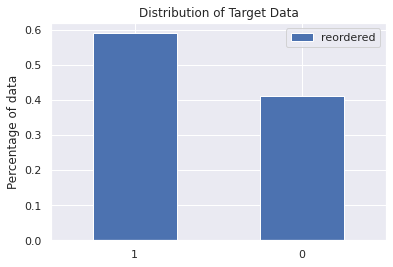

In [0]:
sns.set_theme()
ax = (prior_train_orders_pd['reordered'].value_counts()/prior_train_orders_pd.shape[0]).plot.bar()
ax.set_xticklabels(['1','0'], rotation = 0)  # convert it to first time orders and Reorders
ax.set_ylabel("Percentage of data")
ax.set_title('Distribution of Target Data')
ax.legend()

In [0]:
prior_set = prior_train_orders_pd[prior_train_orders_pd['eval_set']=='prior']
train_set = prior_train_orders_pd[prior_train_orders_pd['eval_set']=='train']

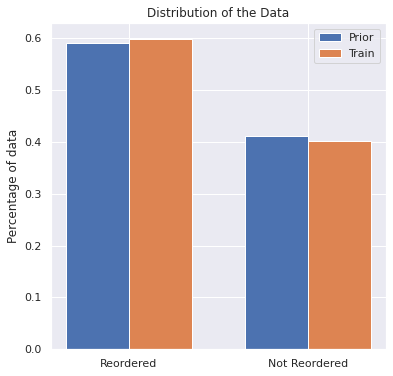

In [0]:
prior_set = prior_set['reordered'].value_counts()/prior_set.shape[0]
train_set = train_set['reordered'].value_counts()/train_set.shape[0]

width = 0.35  
x = np.array([0,1])
fig, ax = plt.subplots(figsize=(6,6))
rects1 = ax.bar(x - width/2, prior_set, width, label='Prior')
rects2 = ax.bar(x + width/2, train_set, width, label='Train')

ax.set_ylabel('Percentage of data')
ax.set_title('Distribution of the Data')
ax.set_xticks(x)
ax.set_xticklabels(['Reordered','Not Reordered'])
ax.legend()
plt.show()

In [0]:
orders_pd = orders.toPandas()

In [0]:
print("Total Users :",prior_train_orders_pd['user_id'].nunique())
print("Users in train :",prior_train_orders_pd[prior_train_orders_pd['eval_set']=='train']['user_id'].nunique())
print("Users in test :",orders_pd[orders_pd['eval_set']=='test']['user_id'].nunique())

Total Users : 206209
Users in train : 131209
Users in test : 75000


In [0]:
orders_count = orders_pd.groupby(['user_id'])['order_id'].agg(lambda group: len(group.unique()))\
                .reset_index(name='order_count')\
                .set_index('user_id')

In [0]:
print("Minimum orders per user :",orders_count['order_count'].min())
print("Maximum orders per user :",orders_count['order_count'].max())

Minimum orders per user : 4
Maximum orders per user : 100


Out[94]: <matplotlib.legend.Legend at 0x7fb4bbffc790>

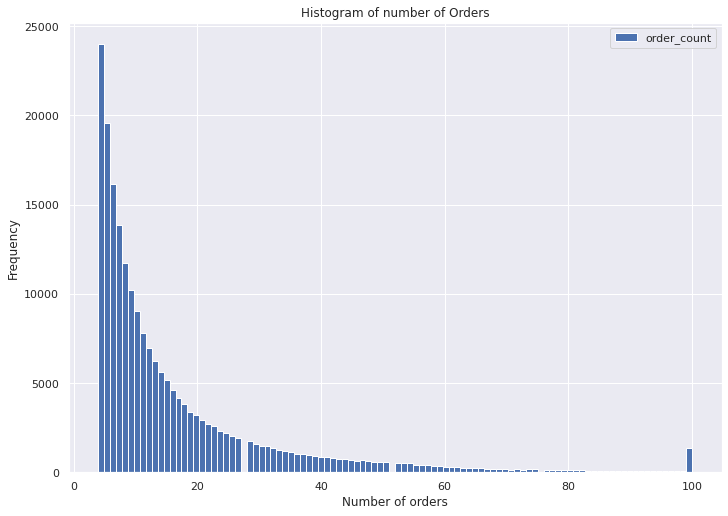

In [0]:
ax = orders_count.plot.hist(bins = 100)
ax.set_xlabel("Number of orders")
ax.set_title('Histogram of number of Orders')
ax.legend()

In [0]:
orders_count = prior_train_orders_pd.groupby(['order_id'])['reordered'].sum().reset_index(name = 'counts')
order_with_reordered_items , order_with_no_reordered_items= sum(orders_count['counts']!=0) , sum(orders_count['counts']==0)

print('Orders with reordered items :',order_with_reordered_items/prior_train_orders_pd['order_id'].nunique())
print('Orders with no reordered items :',order_with_no_reordered_items/prior_train_orders_pd['order_id'].nunique())

Orders with reordered items : 0.8813194412690899
Orders with no reordered items : 0.11868055873091014


In [0]:
print("There are total {} different products ".format(prior_train_orders_pd['product_name'].nunique()))

There are total 49684 different products 


In [0]:
df = prior_train_orders_pd.groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'order_rate').sort_values(by ='order_rate', ascending = False)
df['order_rate'] = df['order_rate']/prior_train_orders_pd['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

,order_rate
product_name,
Banana,0.14683
Bag of Organic Bananas,0.11803
Organic Strawberries,0.08236
Organic Baby Spinach,0.07522
Organic Hass Avocado,0.06601
...,...
'Swingtop' Premium Lager,0.00000
Vanilla Bean Sheep Milk Ice Cream,0.00000
Pappardelle Nests Pasta,0.00000


Out[29]: Text(0.5, 1.0, 'Frequently ordered product')

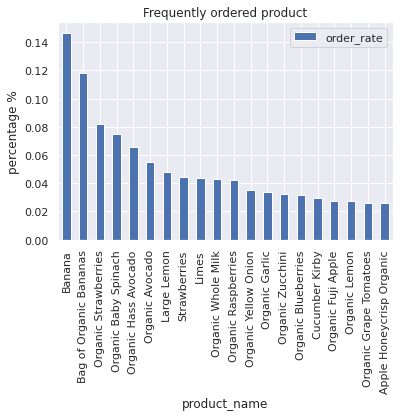

In [0]:
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently ordered product')

In [0]:
print("Least frequently ordered product ")
print("\n",prior_train_orders_pd['product_name'].value_counts()[-10:])

Least frequently ordered product 

 String Of Pearl White Sprinkles                           1
Organic Aleppo Pepper                                     1
Sloppy Joe Sandwich Makers                                1
Flax Oil, Organic, Omega-3, Original Formula              1
Max White With Polishing Star Soft Toothbrush             1
12 Inch Taper Candle White                                1
Pure Performance Restorative Shampoo Chamomile & Honey    1
Yellow Fish Breading                                      1
Orangemint Flavored Water                                 1
Flatbread Pizza All Natural                               1
Name: product_name, dtype: int64


In [0]:
df = prior_train_orders_pd[prior_train_orders_pd['reordered'] ==1].groupby(['product_name'])['product_name'].size().\
        reset_index(name = 'reorder_rate').sort_values(by ='reorder_rate', ascending = False)
df['reorder_rate'] = df['reorder_rate']/prior_train_orders_pd[prior_train_orders_pd['reordered'] ==1]['order_id'].nunique()
df.set_index('product_name', inplace = True)
df.round(5)

,reorder_rate
product_name,
Banana,0.14078
Bag of Organic Bananas,0.11166
Organic Strawberries,0.07272
Organic Baby Spinach,0.06610
Organic Hass Avocado,0.05974
...,...
Maximum Strength Instant Pain Relief Gel,0.00000
"Nighttime Cough DM, Maximum Strength, Adult",0.00000
"Apricot, Cake & Pasty Filling",0.00000


Out[32]: Text(0.5, 1.0, 'Frequently reordered product')

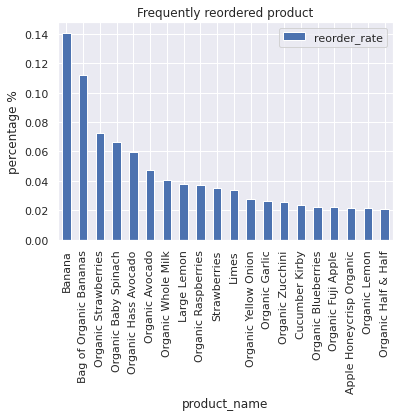

In [0]:
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product')

In [0]:
print("\nLeast frequently reordered product ")
print("\n",prior_train_orders_pd[prior_train_orders_pd['reordered'] ==1]['product_name'].value_counts()[-10:])


Least frequently reordered product 

 38210 Full Jaw Cuticle Nipper                                              1
Black Pearl Liquid Eyeliner                                                1
Original Ultra Concentrated Dish Liquid                                    1
Black Garlic Bulbs                                                         1
Skullcap Extract                                                           1
Biotin 1000 mcg Tablets                                                    1
Hot & Spicy with Beans Chili                                               1
Sweet Gala Apples with Almonds & Sliced Apples with Mild Cheddar Cheese    1
SPF 20 Vanilla Lip Balm                                                    1
Wild Rice, 100% Natural                                                    1
Name: product_name, dtype: int64


In [0]:
print("There are total {} different aisles ".format(prior_train_orders_pd['aisle'].nunique()))

There are total 134 different aisles 


In [0]:
df = prior_train_orders_pd.groupby(['aisle']).size().reset_index(name='order_count')
aisle_reorder_rate = prior_train_orders_pd[prior_train_orders_pd['reordered']==1].groupby(['aisle']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = aisle_reorder_rate['reorder_rate']/df['order_count']

Out[36]: <matplotlib.legend.Legend at 0x7fb4c526e070>

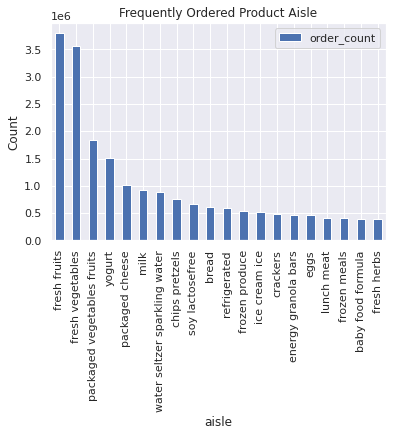

In [0]:
ax = df[['aisle','order_count']].sort_values(by='order_count', ascending = False)[:20].plot.bar(x = 'aisle', y='order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently Ordered Product Aisle')
ax.legend()

Out[37]: <matplotlib.legend.Legend at 0x7fb4c4f2c0a0>

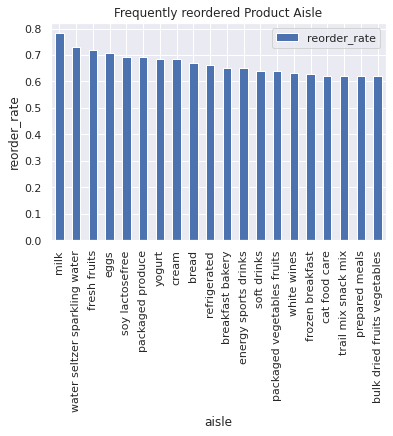

In [0]:
ax = df[['aisle','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'aisle', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Aisle')
ax.legend()

In [0]:
df.sort_values(by = 'reorder_rate', axis=0, ascending=False, inplace = True)

print("Most frequently reordered product aisles")
df[:10]

Most frequently reordered product aisles


,aisle,order_count,reorder_rate
83,milk,923659,0.781812
131,water seltzer sparkling water,878150,0.729930
50,fresh fruits,3792661,0.718823
41,eggs,472009,0.706359
119,soy lactosefree,664493,0.692361
96,packaged produce,289488,0.691977
133,yogurt,1507583,0.686501
33,cream,330358,0.685184
11,bread,608469,0.670552
110,refrigerated,599109,0.663006


In [0]:
print("Least frequently reordered product aisles")
df[-10:]

Least frequently reordered product aisles


,aisle,order_count,reorder_rate
67,hair care,33482,0.246759
115,skin care,10698,0.242849
34,deodorants,15673,0.238818
29,cold flu allergy,27407,0.235341
44,eye ear care,9522,0.220542
8,beauty,6455,0.212858
47,first aid,11411,0.195864
76,kitchen supplies,9620,0.194802
7,baking supplies decor,24786,0.167595
122,spices seasonings,221371,0.152933


In [0]:
print("There are total {} different departments ".format(prior_train_orders_pd['department'].nunique()))

There are total 21 different departments 


In [0]:
df = prior_train_orders_pd.groupby(['department']).size().reset_index(name='order_count')
dept_reorder_rate = prior_train_orders_pd[prior_train_orders_pd['reordered']==1].groupby(['department']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = dept_reorder_rate['reorder_rate']/df['order_count']

Out[43]: <matplotlib.legend.Legend at 0x7fb4c5a9d430>

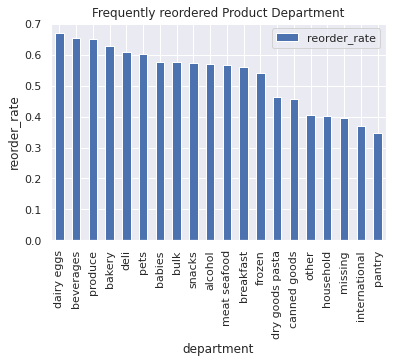

In [0]:
ax = df[['department','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'department', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Department')
ax.legend()

In [0]:
df.sort_values(by = 'reorder_rate', axis=0, ascending=False, inplace = True)

print("Most frequently reordered product departments")
df[:5]

Most frequently reordered product departments


,department,order_count,reorder_rate
7,dairy eggs,5631067,0.670161
3,beverages,2804175,0.653651
19,produce,9888378,0.650521
2,bakery,1225181,0.628381
8,deli,1095540,0.608130


In [0]:
print("Least frequently reordered product aisles")
df[-5:]

Least frequently reordered product aisles


,department,order_count,reorder_rate
11,household,774649,0.403340
14,missing,77396,0.394323
12,international,281155,0.369682
16,pantry,1956819,0.347400
17,personal care,468693,0.321863


In [0]:
depts_aisles = prior_train_orders_pd.groupby(['department'])['aisle'].agg(lambda group: group.unique().tolist())\
                .reset_index(name = 'aisles')

In [0]:
dairy_eggs = depts_aisles.loc[depts_aisles['department']=='dairy eggs']['aisles'].tolist()
beverages = depts_aisles.loc[depts_aisles['department']=='beverages']['aisles'].tolist()
produce = depts_aisles.loc[depts_aisles['department']=='produce']['aisles'].tolist()
personal_care = depts_aisles.loc[depts_aisles['department']=='personal care']['aisles'].tolist()

In [0]:
dairy_eggs

Out[49]: [['yogurt',
  'other creams cheeses',
  'packaged cheese',
  'eggs',
  'soy lactosefree',
  'milk',
  'cream',
  'butter',
  'refrigerated pudding desserts',
  'specialty cheeses']]

In [0]:
beverages

Out[50]: [['refrigerated',
  'energy sports drinks',
  'water seltzer sparkling water',
  'juice nectars',
  'soft drinks',
  'coffee',
  'tea',
  'cocoa drink mixes']]

In [0]:
produce

Out[51]: [['fresh vegetables',
  'fresh fruits',
  'packaged vegetables fruits',
  'packaged produce',
  'fresh herbs']]

In [0]:
personal_care

Out[52]: [['cold flu allergy',
  'body lotions soap',
  'soap',
  'oral hygiene',
  'muscles joints pain relief',
  'hair care',
  'beauty',
  'deodorants',
  'facial care',
  'feminine care',
  'vitamins supplements',
  'digestion',
  'protein meal replacements',
  'shave needs',
  'first aid',
  'eye ear care',
  'skin care']]

In [0]:
df = pd.DataFrame({'reorder_rate': prior_train_orders_pd.groupby(['product_name','aisle','department','reordered'])['reordered'].\
                                                       count().groupby(level=0).\
                                                       apply(lambda x: x / float(x.sum()))}).reset_index()
df_reorder = df[df['reordered']==1].drop(['reordered'], axis =1)
df_reorder.sort_values(by = 'reorder_rate', ascending = False, inplace = True)

df_reorder

,product_name,aisle,department,reorder_rate
71744,Raw Veggie Wrappers,prepared meals,deli,0.942029
76495,Serenity Ultimate Extrema Overnight Pads,feminine care,personal care,0.933333
54399,Orange Energy Shots,energy sports drinks,beverages,0.923077
16385,Chocolate Love Bar,candy chocolate,snacks,0.921569
80044,Soy Powder Infant Formula,baby food formula,babies,0.914286
...,...,...,...,...
3946,"Allspice, Ground, Organic",spices seasonings,pantry,0.012821
56162,Organic Chinese Five Spice,spices seasonings,pantry,0.011236
62346,Organic Whole Nutmeg,spices seasonings,pantry,0.009434
55890,Organic Caraway Seeds,spices seasonings,pantry,0.007042


Out[54]: <matplotlib.legend.Legend at 0x7fb509f98040>

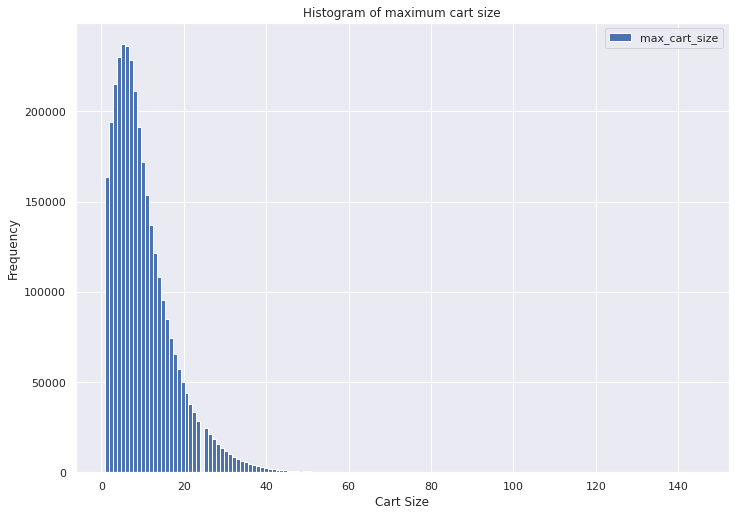

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
max_cart_size = prior_train_orders_pd.groupby(['order_id'])['add_to_cart_order'].aggregate(np.max)\
                                                            .reset_index(name = 'max_cart_size')
ax = max_cart_size['max_cart_size'].plot.hist(bins = 150, color = 'b')
ax.set_xlabel("Cart Size")
ax.set_title('Histogram of maximum cart size')
ax.legend()

In [0]:
max_cart_size['max_cart_size'].value_counts()[:1]

Out[71]: 5    237225
Name: max_cart_size, dtype: int64

Out[56]: <matplotlib.legend.Legend at 0x7fb4bc042850>

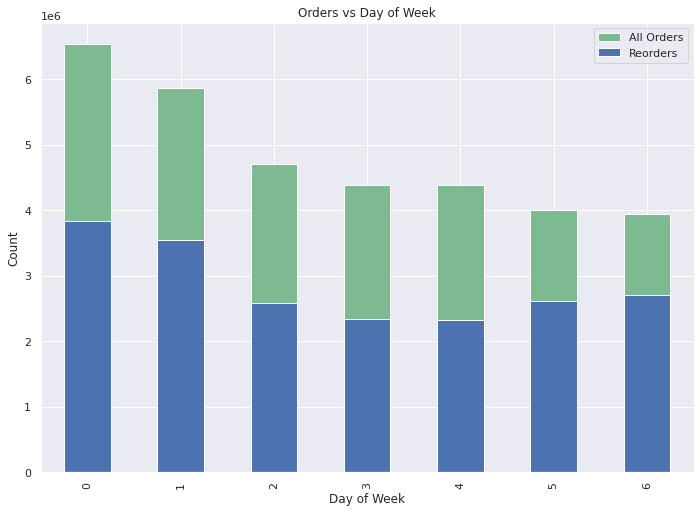

In [0]:
sns.set_theme(context='notebook', style='darkgrid', palette="crest")
ax = prior_train_orders_pd['order_dow'].value_counts().plot.bar()
ax = prior_train_orders_pd[prior_train_orders_pd['reordered']==1].groupby(['order_dow']).size().plot.bar(color = 'b')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Count")
ax.set_title('Orders vs Day of Week')
ax.legend(["All Orders", "Reorders"])

Out[57]: <matplotlib.legend.Legend at 0x7fb4bbf3b0d0>

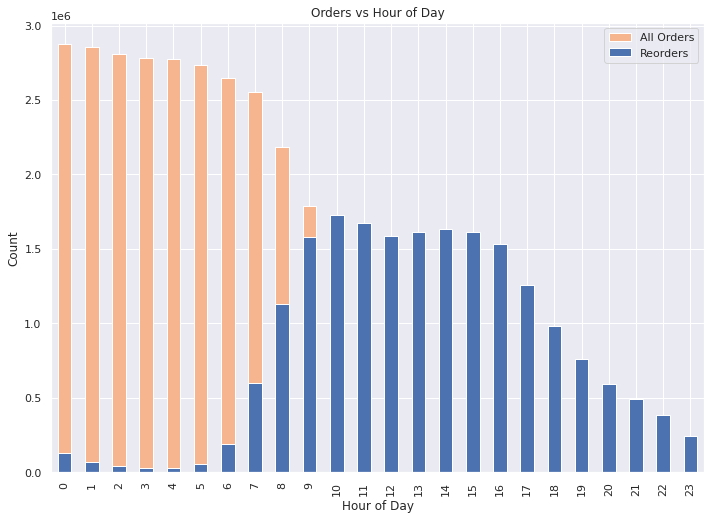

In [0]:
sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")
ax = prior_train_orders_pd['order_hour_of_day'].value_counts().plot.bar()
ax = prior_train_orders_pd[prior_train_orders_pd['reordered']==1].groupby(['order_hour_of_day']).size().plot.bar(color = 'b')
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Count")
ax.set_title('Orders vs Hour of Day')
ax.legend(["All Orders", "Reorders"])

Out[58]: <matplotlib.legend.Legend at 0x7fb4bbddc8b0>

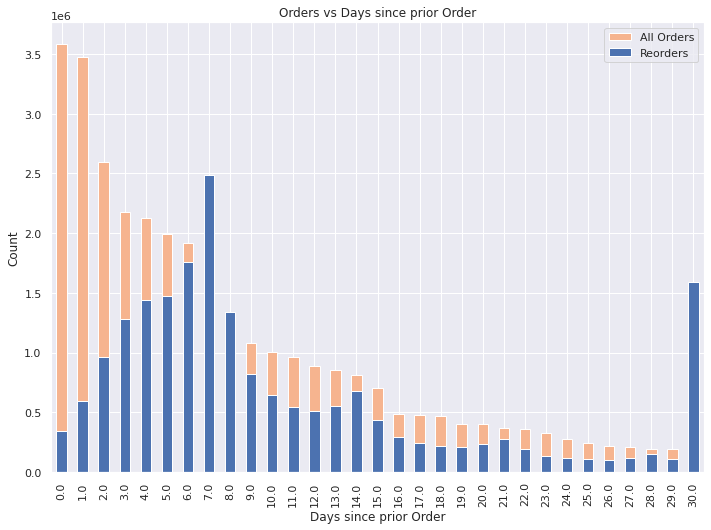

In [0]:
sns.set_theme(context='notebook', style='darkgrid', palette="rocket_r")
ax = prior_train_orders_pd['days_since_prior_order'].value_counts().plot.bar()
ax = prior_train_orders_pd[prior_train_orders_pd['reordered']==1].groupby(['days_since_prior_order']).size().plot.bar(color = 'b')
ax.set_xlabel("Days since prior Order")
ax.set_ylabel("Count")
ax.set_title('Orders vs Days since prior Order')
ax.legend(["All Orders", "Reorders"])

Out[60]: Text(0.5, 1.0, 'Frequently reordered product by weekly buyers')

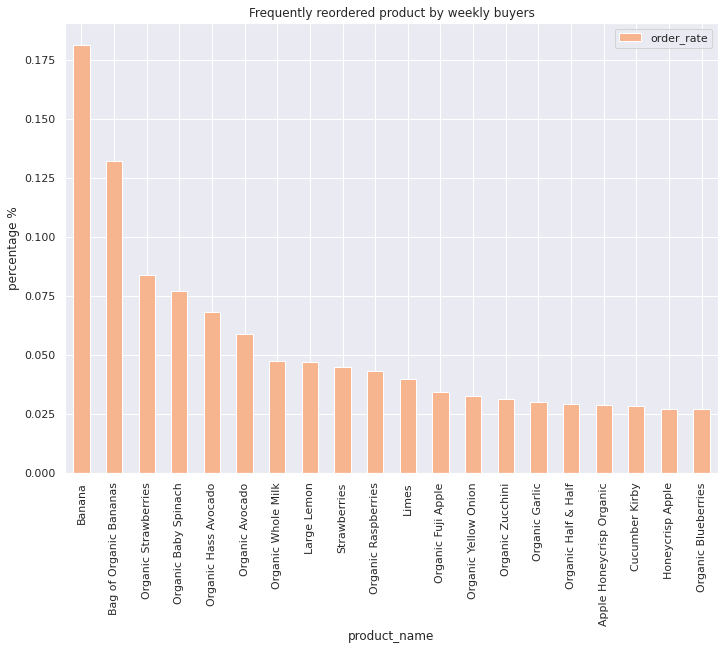

In [0]:
df = prior_train_orders_pd[(prior_train_orders_pd['days_since_prior_order']==7.0) & (prior_train_orders_pd['reordered']==1.0)].groupby('product_name')['product_name'].size().\
            reset_index(name = 'order_rate').sort_values(by = 'order_rate', ascending = False)
df['order_rate'] = df['order_rate']/ prior_train_orders_pd[(prior_train_orders_pd['days_since_prior_order']==7.0) & (prior_train_orders_pd['reordered']==1.0)]['order_id'].nunique()
df.set_index('product_name', inplace = True)


ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product by weekly buyers')

In [0]:
df[:20]

,order_rate
product_name,
Banana,0.181724
Bag of Organic Bananas,0.132152
Organic Strawberries,0.083824
Organic Baby Spinach,0.077275
Organic Hass Avocado,0.068253
Organic Avocado,0.058786
Organic Whole Milk,0.047242
Large Lemon,0.047144
Strawberries,0.044832


Out[62]: Text(0.5, 1.0, 'Frequently reordered product by monthly buyers')

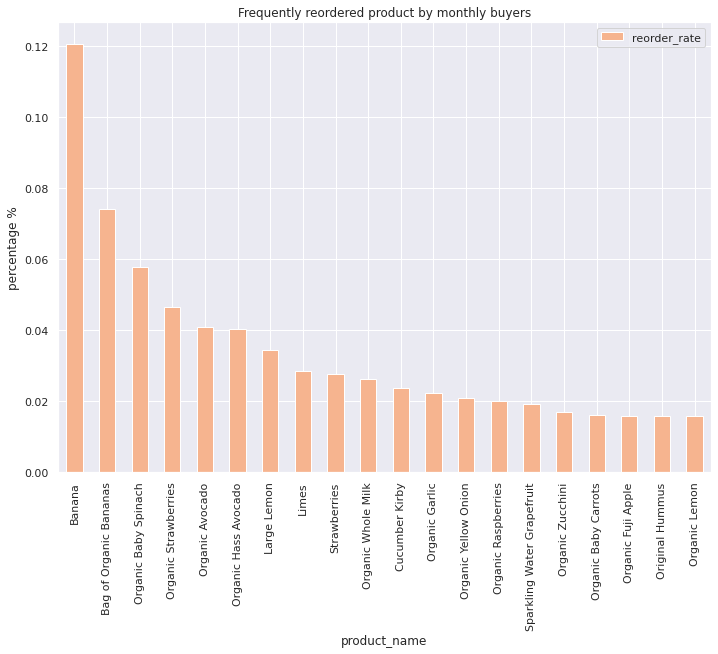

In [0]:
df = prior_train_orders_pd[(prior_train_orders_pd['days_since_prior_order']==30.0) & (prior_train_orders_pd['reordered']==1.0)].\
        groupby('product_name')['product_name'].size().\
        reset_index(name = 'reorder_rate').sort_values(by = 'reorder_rate', ascending = False)
df['reorder_rate'] = df['reorder_rate']/prior_train_orders_pd[(prior_train_orders_pd['days_since_prior_order']==30.0) & (prior_train_orders_pd['reordered']==1)]\
                    ['order_id'].nunique()
df.set_index('product_name', inplace = True)

#top 20 frequently reordered product
ax = df[:20].plot.bar()
ax.set_ylabel("percentage %")
ax.set_title('Frequently reordered product by monthly buyers')

In [0]:
df[:20]

,reorder_rate
product_name,
Banana,0.120750
Bag of Organic Bananas,0.074116
Organic Baby Spinach,0.057675
Organic Strawberries,0.046598
Organic Avocado,0.040948
Organic Hass Avocado,0.040223
Large Lemon,0.034213
Limes,0.028454
Strawberries,0.027699


Out[64]: <AxesSubplot:>

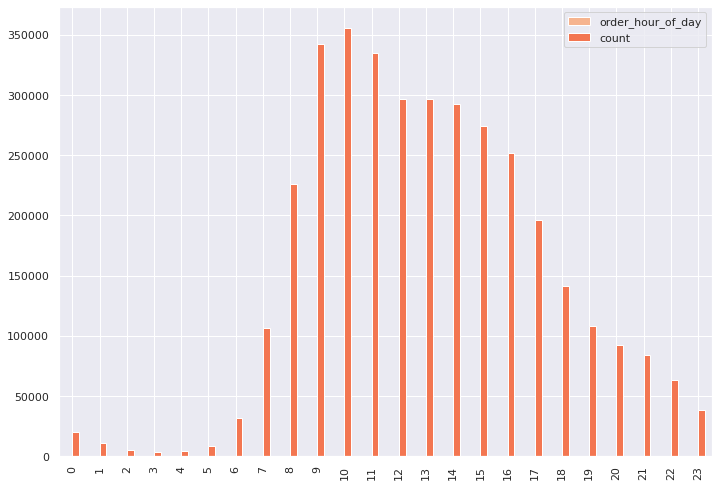

In [0]:
prior_train_orders_pd[(prior_train_orders_pd['days_since_prior_order']==7.0)].\
    groupby('order_hour_of_day')['order_hour_of_day'].count().\
    reset_index(name = 'count').plot.bar()

Out[65]: <AxesSubplot:>

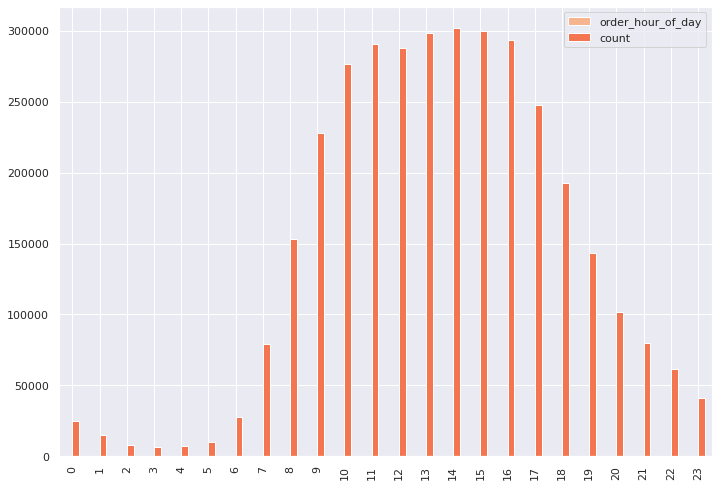

In [0]:
prior_train_orders_pd[(prior_train_orders_pd['days_since_prior_order']==30.0)].\
    groupby('order_hour_of_day')['order_hour_of_day'].count().\
    reset_index(name = 'count').plot.bar()

In [0]:
x = prior_train_orders_pd.groupby(['order_dow','order_hour_of_day','product_name'])['product_name'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'product_name')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
1,Bag of Organic Bananas,Banana,Banana,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
2,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
3,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Bag of Organic Bananas
4,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
5,Banana,Bag of Organic Bananas,Bag of Organic Bananas,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana
6,Banana,Banana,Bag of Organic Bananas,Banana,Bag of Organic Bananas,Banana,Banana,Banana,Banana,Banana,...,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana,Banana


In [0]:
x = prior_train_orders_pd.groupby(['order_dow','order_hour_of_day','aisle'])['aisle'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'aisle')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,...,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
1,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
2,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
3,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits
4,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables
5,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,...,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,fresh vegetables
6,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh fruits,fresh vegetables,...,fresh vegetables,fresh vegetables,fresh vegetables,fresh vegetables,fresh fruits,fresh vegetables,fresh fruits,fresh vegetables,fresh vegetables,fresh vegetables


In [0]:
x = prior_train_orders_pd.groupby(['order_dow','order_hour_of_day','department'])['department'].size().reset_index(name = 'count')
idx = x.groupby(['order_dow','order_hour_of_day'], sort=False)['count'].transform(max) == x['count']
x = x[idx].drop_duplicates(subset=['order_dow','order_hour_of_day'], keep='first')
x = x.pivot(index = 'order_dow',columns = 'order_hour_of_day',values = 'department')
x

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
1,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
2,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
3,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
4,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
5,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce
6,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce,...,produce,produce,produce,produce,produce,produce,produce,produce,produce,produce


Out[81]: <matplotlib.legend.Legend at 0x7fb4c2f7b8b0>

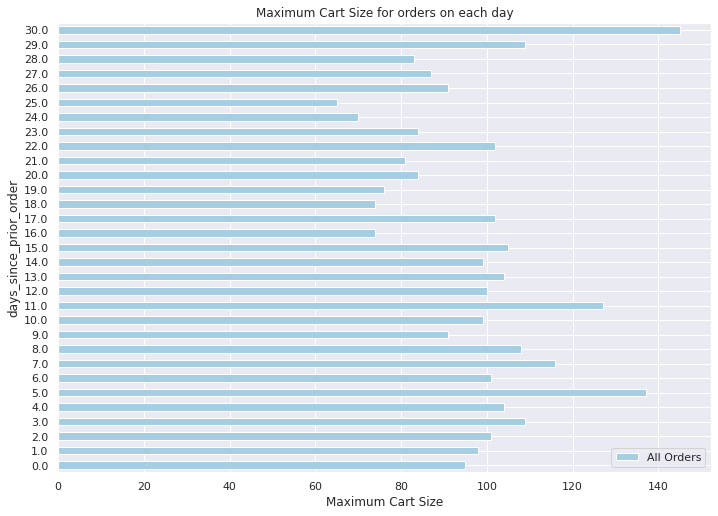

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = prior_train_orders_pd.groupby(['days_since_prior_order'])['add_to_cart_order'].aggregate(np.max).plot(kind='barh',colormap='Paired')
ax.set_xlabel("Maximum Cart Size")
ax.set_title('Maximum Cart Size for orders on each day')
ax.legend(["All Orders"])

Out[86]: <matplotlib.legend.Legend at 0x7fb4bbe9ddf0>

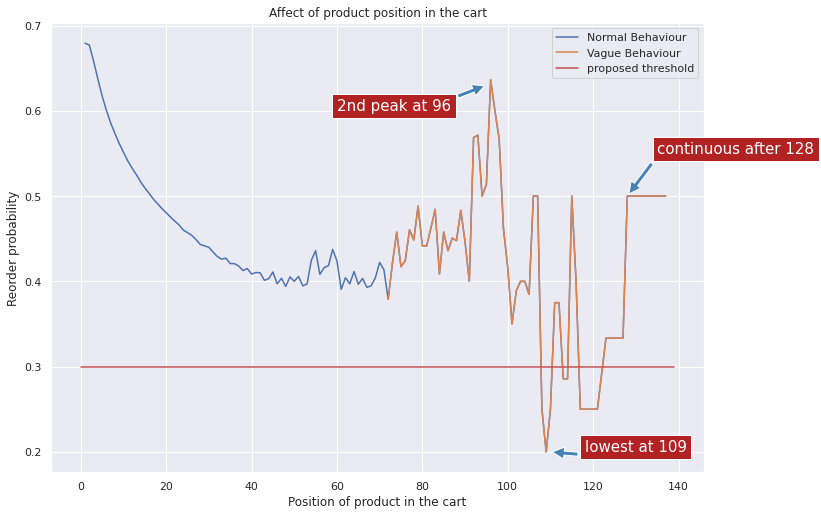

In [0]:
df = pd.DataFrame({'reorder_rate': prior_train_orders_pd.groupby(['add_to_cart_order','reordered'])['reordered'].\
                                                       count().groupby(level=0).\
                                                       apply(lambda x: x / float(x.sum()))}).reset_index()
ax = df[df['reordered']==1].set_index('add_to_cart_order')['reorder_rate'].plot()
ax = df[df['reordered']==1].set_index('add_to_cart_order')['reorder_rate'][71:].plot()
x = [*range(0,140)]
y = [0.3 for _ in range(140)]
ax.plot(x, y, '-r')
ax.set_xlabel('Position of product in the cart')
ax.set_ylabel('Reorder probability')
ax.set_title('Affect of product position in the cart')

ax.annotate('lowest at 109', xy=(110, 0.2), xytext=(118, 0.2),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.annotate('continuous after 128', xy=(128, 0.5), xytext=(135, 0.55),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.annotate('2nd peak at 96', xy=(95, 0.63), xytext=(60, 0.6),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')
ax.legend(["Normal Behaviour", "Vague Behaviour", "proposed threshold"])

In [0]:
df = prior_train_orders_pd.groupby(['user_id','order_id','reordered'])['reordered'].count()
df = (df / df.groupby(level=1).sum()).reset_index(name = 'reorder_prob')
df = pd.DataFrame(df[(df['reordered']==1) & (df['reorder_prob']==1.0)]['user_id'].value_counts().reset_index(name = 'count'))
df.columns = ['user_id', 'count']

df[:10]

,user_id,count
0,99753,99
1,26489,96
2,17997,94
3,100935,94
4,69919,93
5,175680,92
6,145481,91
7,140753,91
8,39993,90
9,127577,90


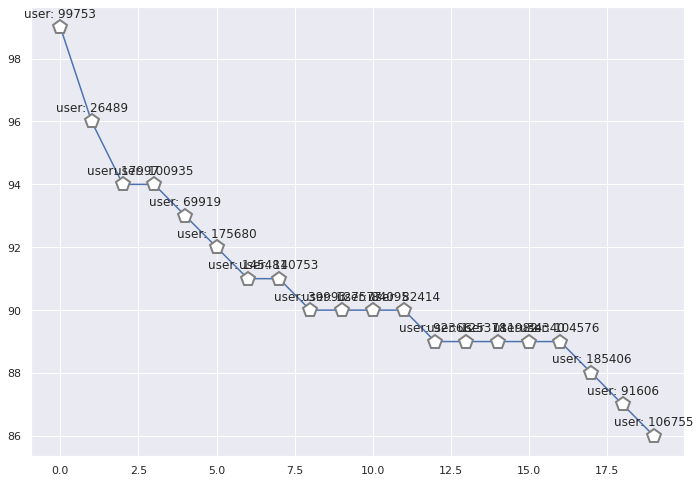

In [0]:
usr_ids = df['user_id'][:20].tolist()
counts = df['count'][:20].tolist()

plt.plot(counts)
for i,c in enumerate(counts):
    plt.plot(i, c, '-p', color='gray', markersize=15, linewidth=4,
         markerfacecolor='white',markeredgecolor='gray',markeredgewidth=2)
    plt.annotate("user: "+str(usr_ids[i]), # this is the text
                 (i,c), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 